<a href="https://colab.research.google.com/github/joseluisnaranjo/QuasiPhaseEquilibrium/blob/master/Multioutput_QuiasiPhaseEquilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Lanzhou University Of Tehcnology**
> [LUT website](https://www.lut.edu.cn/) 

![texto alternativo](https://media-exp1.licdn.com/dms/image/C4E0BAQFQAetOtpLtZw/company-logo_200_200/0?e=1593648000&v=beta&t=OXpnfAl0bTkHfBb1sbnR2ZadKk-51e9c4IykdyBfqFI)


---



 **Improving** the fast prediction of the quasi phase equilibrum in phase field model for multicomponet alloys. 

We aim to improve the phase field model for multicomponent alloys introduced by **Xue Jiang** et al., In the published pair they provide the data used to obtain their results, therefor we are using the same data set in order to have evidence that our Neural Network Model (NN) for the fast prediction of the quasi phase equilibrium. We propose a robust NN which incorporates several layers including convolutional and pulling layers in the case they are implemnted. 

As a forst step, we are going to load the data as following: 

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
from numpy import genfromtxt
my_training_data = genfromtxt('Data100kTraining.csv', delimiter=',')
my_test_data = genfromtxt('Data1kTesting.csv', delimiter=',')
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3]
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3]

In [73]:

print (training_outputdata)

[0.03423592 0.03418403 0.01220378 ... 0.10069036 0.0385227  0.01750982]


In [147]:
import numpy as np
from numpy import  newaxis

training_input = training_inputdata[:,:,newaxis]
training_output = training_outputdata.reshape(100000,1)
test_input = test_inputdata[:,:,newaxis]
test_output = test_outputdata.reshape(1000,1)
print (training_input.shape)
print (training_output.shape)
print (test_input.shape)
print (test_output.shape)

(100000, 3, 1)
(100000, 1)
(1000, 3, 1)
(1000, 1)



Let's start with our import of TensorFlow

In [74]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [75]:
import tensorflow as tf
print(tf.__version__)

1.15.2


Notice that all of the values in the number are already between 0 and 1. If we are training a neural network, for various reasons it's easier if we treat all values in this range, a process called **normalization**'...and fortunately in Python it's easy to normalize a list like this without looping. 

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 
In our design we will be playing with the number of layers and the number of newrons that will have each one, however the inicial values will be taking from a teoretical analisys that will be shown in a separe file in the GitHub directory.

Remenber,  the following model has as input: cMg cCu y Fhi; and as outputs: Mgl, Mgs, Cul, Cus. It was designed to predict one of the output Mgl

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

**Stochastic Gradien Descent**

Train on 100000 samples, validate on 1000 samples
Epoch 1/20
100000/100000 [==============================] - 1s 13us/sample - loss: 9.6548e-04 - acc: 0.0000e+00 - val_loss: 6.2941e-04 - val_acc: 0.0000e+00
Epoch 2/20
100000/100000 [==============================] - 1s 8us/sample - loss: 6.0422e-04 - acc: 0.0000e+00 - val_loss: 5.0421e-04 - val_acc: 0.0000e+00
Epoch 3/20
100000/100000 [==============================] - 1s 8us/sample - loss: 5.0746e-04 - acc: 0.0000e+00 - val_loss: 4.4474e-04 - val_acc: 0.0000e+00
Epoch 4/20
100000/100000 [==============================] - 1s 8us/sample - loss: 4.6175e-04 - acc: 0.0000e+00 - val_loss: 4.1881e-04 - val_acc: 0.0000e+00
Epoch 5/20
100000/100000 [==============================] - 1s 8us/sample - loss: 4.3825e-04 - acc: 0.0000e+00 - val_loss: 4.0232e-04 - val_acc: 0.0000e+00
Epoch 6/20
100000/100000 [==============================] - 1s 8us/sample - loss: 4.2197e-04 - acc: 0.0000e+00 - val_loss: 3.9055e-04 - val_acc: 0.0000e+00
Epoch 7/20
10

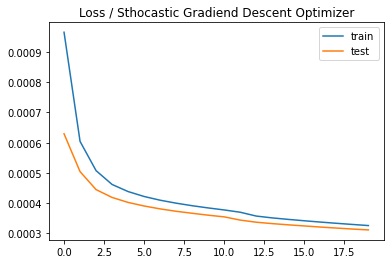

In [149]:
model.compile(optimizer = 'sgd',
              loss = 'mean_squared_error',
              metrics=['accuracy'])

history = model.fit(training_input, training_output, validation_data=(test_input, test_output), epochs=20, batch_size=256)
#model.evaluate(test_input, test_output)

classifications = model.predict(test_input)

print(classifications[0])
print(test_output[0])

# plot loss during training
from matplotlib import pyplot
pyplot.title('Loss / Sthocastic Gradiend Descent Optimizer')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# plot loss during training

Computation of the Mean Relative Error for each of the values predicted (individually)

In [150]:
Value = classifications
Predi = test_output
N = Predi.size
ValueX = Value.reshape(N,1)
PrediX = Predi.reshape(N,1)
error = np.sum(np.absolute((ValueX - PrediX)/ValueX))/N
print(error)

0.309897102829366


**TensorFlow version 1.15.0**

Following, is presented the model used to predict the solutions for  the quasi phase equilibriem equations, in the 5-layer model  used in this project. 

In [151]:
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3:7]
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3:7]
print (training_inputdata.shape)
print( training_outputdata.shape)
print (test_inputdata.shape)
print(test_outputdata.shape)

(100000, 3)
(100000, 4)
(1000, 3)
(1000, 4)


In [0]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
trainX = training_inputdata
testX = test_inputdata
trainy = training_outputdata
testy = test_outputdata

In [153]:
# define model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, input_dim=64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, input_dim=128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, input_dim=256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500,batch_size=128, verbose=0)
print(history.)

Train: 0.935, Test: 0.941


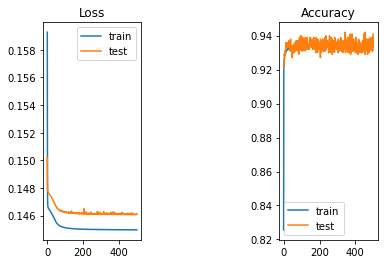

[0.40250257 0.12961166 0.4205369  0.04734885]
[0.05552293 0.01819259 0.0741486  0.00880691]


In [154]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(131)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(133)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

pyplot.show()
classifications = model.predict(testX)
print(classifications[0])
print(testy[0, :])

Transformation of the percentages to real predictions values:

In [155]:
i = 0
predictionsList = []
for classification in classifications:
  prediction = []
  subtotal = np.sum(testy[i,:])  
  for value in classification:    
    data = ((value * subtotal))
    prediction.append(data)    
  predictionsList.append(prediction)
  i = i+1
predictions =  np.array(predictionsList)
print (predictions)  

[[0.06306049 0.02030639 0.06588595 0.00741819]
 [0.0219717  0.00741303 0.0444617  0.00662369]
 [0.06612435 0.02394927 0.00338539 0.00040254]
 ...
 [0.0983896  0.03445678 0.11359142 0.01725488]
 [0.03948933 0.01329475 0.08637157 0.01295266]
 [0.08566655 0.02947008 0.11751999 0.01735661]]


Mean Relative Error 

In [0]:
MglValue = testy[:,0]
MglPredi = predictions[:,0]
N = MglPredi.size
MglValue = MglValue.reshape(N,1)
MglPredi = MglPredi.reshape(N,1)
ErrorMgl = np.sum(np.absolute((MglValue - MglPredi)/MglValue))/N

MgsValue = testy[:,1]
MgsPredi = predictions[:,1]
N = MgsPredi.size
MgsValue = MgsValue.reshape(N,1)
MgsPredi = MgsPredi.reshape(N,1)
ErrorMgs = np.sum(np.absolute((MgsValue - MgsPredi)/MgsValue))/N

CulValue = testy[:,2]
CulPredi = predictions[:,2]
N = CulPredi.size
CulValue = CulValue.reshape(N,1)
CulPredi = CulPredi.reshape(N,1)
ErrorCul = np.sum(np.absolute((CulValue - CulPredi)/CulValue))/N

CusValue = testy[:,3]
CusPredi = predictions[:,3]
N = CusPredi.size
CusValue = CusValue.reshape(N,1)
CusPredi = CusPredi.reshape(N,1)
ErrorCus = np.sum(np.absolute((CusValue - CusPredi)/CusValue))/N


print("The Mean Relative Erros for each of the predictions are the following:")
print ("CuS Errors is:" + str( ErrorCus))
print ("CuL Errors is:" + str( ErrorCul))
print ("MgS Errors is:" + str( ErrorMgs))
print ("MgL Errors is:" + str( ErrorMgl))


MgL Errors is:0.2079344946442912
MgS Errors is:0.16129730884296245
CuL Errors is:0.44087152224412135
CuS Errors is:0.7269395794505851


In [0]:
j=0
for i in CulValue :
  print(str(i)+", "+ str( CulPredi[j,0])) 
  j = j+1

**Conclution**

As can be seen, the implemneted NN have provide subtantially great improvement over the NN model presented in the original paper.